# (2.10) Polymers and random walks
20220160 Jungeun Kim, Dept. of Physics, KAIST

(Sethna, "Entropy, Order Parameters, and Complexity", 2nd edition, ex. 2.10)

<br/>
Polymers are long molecules, typically made of identical small molecules called monomers that are bonded together in a long, one-dimensional chain. When dissolved in a solvent, the polymer chain configuration often forms a good approximation to a random walk. Typically, neighboring monomers will align at relatively small angles; several monomers are needed to lose memory of the original angle. Instead of modeling all these small angles, we can produce an equivalent problem focusing all the bending in a few hinges; we approximate the polymer by an uncorrelated random walk of straight segments several monomers in length. The equivalent segment size is called the persistence length.

## (a) Random walk
If the persistence length to bending of DNA is $50\ \mathrm{nm}$, with $3.4\ \mathrm{\AA}$ per nucleotide base pair, what will the RMS distance $\sqrt{\left<R^2\right>}$ be between the ends of a gene in solution with 100,000 base pairs, if the DNA is accurately represented as a random walk?

### (Solution)
Let $L_P$ be a persistence length. The $l_i = \pm L_p$ be the displacement in the segment. Then the total displacement between the ends of a gene $R$ is
$$ R = \sum_{i=1}^{N} l_i. $$
Here, $N$ is a total number of segments, which is determined from the number of solution base pairs $N_{solution}$, the length of nucleotide base pair $L_N$, and the persistence length $L_P$.
$$ N = \frac{L_N}{L_P} \times N_{solution} = \frac{3.4 \times 10^{-10} \mathrm{\ m}}{50 \times 10^{-9} \mathrm{\ m}} \times 100 000 = 680. $$
As our $N$ is sufficiently large enough, we can think universality of random walk,
$$ \sigma = \sqrt{\left< R^2 \right>} \sim \sqrt{N} L_{P} = \sqrt{680} \times 50\ \mathrm{nm} \simeq \boxed{1.3 \mathrm{\ \mu m}} . $$


<br/>

Polymers are not accurately represented as pure random walks, however. Random walks, particularly in low dimensions, often intersect themselves. Polymers are best represented as self-avoiding random walks: a polymer samples only those configurations that do not cross themselves.<br/>
Let us investigate whether self-avoidance will change the basic nature of the polymer configuration in two dimensions. In particular, does the end-to-end typical distance continue to scale with the square root of the length $L$ of the polymer, $R \sim \sqrt{L}$?

<br/>

## (b) Two-dimensional self-avoiding random walk.
Give a convincing, short argument explaining whether or not a typical, non self-avoiding random walk in two dimensions will come back after large numbers of monomers and cross itself. (Hint: How big a radius does it extend to? How many times does it traverse this radius?)

### (Solution)
The short argument is: Yes, it would come back. With a central limit theorem, typical random walk in 2-dim follows the Gaussian distribution as $N \rightarrow \infty$, thus the probability to get zero expectation value is the largest.

The longer argument is: 

<br/>

## (c) Simulation

Find or write a simulation of self-avoiding random walks, that allows one to generate multiple walks of a given length (Refer to https://sethna.lassp.cornell.edu/StatMech/EOPCHintsAndMaterials.html). The simulation should model a two-dimensional random walk as a connected line between neighboring lattice points on the square lattice of integers, starting random walks at the origin and discarding them when they hit the same lattice point twice. Average the squared length of the surviving walks as a function of the number of steps.

### (c-1) code

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
import numpy as np
import random
import math
%matplotlib widget

In [2]:
def random_walk_square_lattice(N, L_p) :
    random_xy = [[0, 0]]                        # Initial position at origin
    probability = 1                             # Initial probability

    while len(random_xy) <= N :                 # Repeat the procedure until we have #N number of edge.
        # List of possible path, move right, left, above, down.
        possible_path = [[random_xy[-1][0] + 1, random_xy[-1][1]], [random_xy[-1][0] - 1, random_xy[-1][1]], \
                                    [random_xy[-1][0], random_xy[-1][1] + 1], [random_xy[-1][0], random_xy[-1][1] - 1]]
        # Count the number of possible path among right, left, above, down. 
        path_true_false = np.array([possible_path[i] not in random_xy for i in range(4)])   # True indicates that path is possible.
        num_possible_path = path_true_false.sum()

        # If there is nowhere to go, terminate and reset the coordinate array.
        if num_possible_path == 0 :
            random_xy = [[0, 0]]                # Initial position at origin
            probability = 1                     # Initial probability
            continue
            # return random_walk_square_lattice(N, L_P)

        # Select which path to go.
        # if the path_true_false = [True, False, True, True], and num_index_to_go = 3, go 'down' since it is 3rd direction that is possible(True).
        else :
            num_index_to_go = np.random.randint(1, num_possible_path + 1)
            num_temp = 0
            for i in range(4) :
                if path_true_false[i] :
                    num_temp += 1
                    if num_temp == num_index_to_go :
                        probability = probability * (1/num_possible_path)
                        random_xy.append(possible_path[i])
            
    
    print("Number of edges: ", len(random_xy)-1)
    print("Probability of this path: ", probability)
    return np.array(random_xy)
    

In [38]:
def plot_random_walk(random_xy) : 
    # x, y coordinate from the given array(random_xy)
    arr_x, arr_y = random_xy.T

    plt.figure(figsize=(8,6))

    # Move left y-ax1is and bottom x-ax1is to pass through (0,0). Remove top and right ax1is.
    plt.gca().spines['left'].set_position('zero')
    plt.gca().spines['bottom'].set_position('zero')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    # Set the scale of both ax1is to be same.
    plt.gca().set_aspect('equal')

    # Get a maximum length from the origin.
    max_distance = int(np.sqrt(max(abs(arr_x))**2 + max(abs(arr_y))**2))
    length = int(np.sqrt((arr_x[-1])**2 + (arr_y[-1])**2))
    print("Maximum distance: ", max_distance, "\nlength: ", length, "\nN: ", len(random_xy)-1, "\nsquare root N: ", np.sqrt(len(random_xy)))

    # Span the range within the number of array
    plt.xlim([-max_distance, max_distance+1])
    plt.ylim([-max_distance, max_distance+1])

    # Use only integer as a axix ticker
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))

    # Add grid
    plt.grid(which='both')

    plt.title(r'Random walk ($N=${}, $L_P=1$)'.format(N))

    plt.plot(arr_x, arr_y, linewidth=3.0)
    plt.show()
    

In [39]:
print(abs(-10))

10


Number of edges:  100
Probability of this path:  7.937267535116156e-42
Maximum distance:  23 
length:  17 
N:  100 
square root N:  10.04987562112089


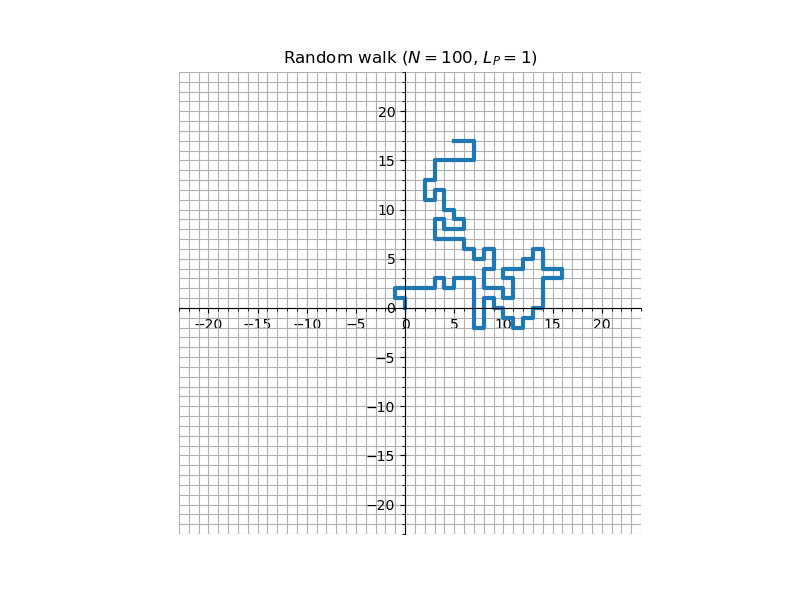

In [41]:
N = 100
L_P = 1
random_xy = random_walk_square_lattice(N, L_P)
plot_random_walk(random_xy)


Measure for a reasonable length of time, print out the current state, and enclose it. Did the simulation give $R \sim \sqrt{L}$? If not, what is the estimate that your simulation gives for the exponent $v$ relating $R$ to $L$? How does it compare with the two-dimensional theoretical exponent $v = 3/4$?

In [ ]:
max_N = 10000
L_P = 1

arr_max_distance = []
arr_length = []

for N in range(1, max_N+1) :
    print(N)
    random_xy = random_walk_square_lattice(N, L_P)
    arr_x, arr_y = random_xy.T
    max_distance = int(np.sqrt(max(abs(arr_x))**2 + max(abs(arr_y))**2))
    length = int(np.sqrt((arr_x[-1])**2 + (arr_y[-1])**2))
    
    arr_max_distance.append(max_distance)
    arr_length.append(length)

In [ ]:
print(arr_max_distance)
print(arr_length)

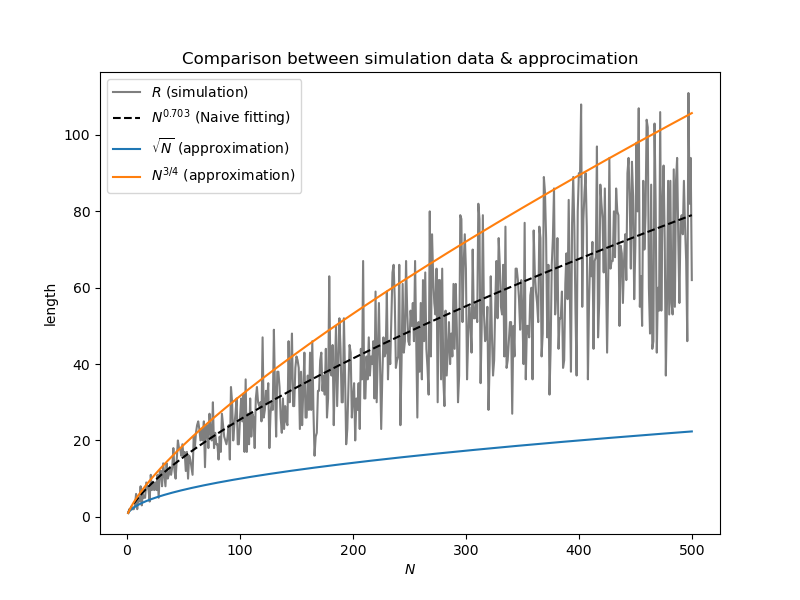

In [25]:
N = np.arange(1, max_N+1)
arr_sqrt_N = np.sqrt(N)
arr_3_div_4_N = N**(3/4)
arr_N_test = N**(45/64)

plt.figure(figsize=(8,6))
plt.plot(N, arr_length, color='black', alpha=0.5, label=r'$R$ (simulation)')
plt.plot(N, arr_N_test, linestyle='--', color='black', label=r'$N^{0.703}$ (Naive fitting)')
plt.plot(N, arr_sqrt_N, label=r'$\sqrt{N}$ (approximation)')
plt.plot(N, arr_3_div_4_N, label=r'$N^{3/4}$ (approximation)')

plt.title('Comparison between simulation data & approcimation')
plt.legend()
plt.xlabel(r'$N$')
plt.ylabel("length")
plt.show()

In [43]:
save_length = arr_length
print(len(save_length), save_length)

500 [1, 2, 2, 2, 2, 2, 3, 6, 2, 5, 4, 8, 3, 6, 5, 5, 9, 8, 7, 4, 11, 7, 9, 7, 9, 7, 11, 5, 12, 12, 8, 14, 11, 8, 14, 10, 11, 13, 11, 13, 18, 12, 10, 15, 20, 18, 18, 16, 19, 16, 17, 12, 17, 10, 16, 15, 13, 11, 21, 18, 22, 24, 25, 23, 20, 23, 20, 25, 13, 24, 24, 18, 27, 22, 20, 30, 18, 22, 19, 19, 15, 21, 17, 27, 24, 21, 20, 19, 21, 24, 15, 34, 30, 20, 24, 27, 31, 19, 19, 26, 31, 25, 32, 17, 36, 17, 27, 19, 31, 21, 27, 26, 18, 31, 34, 30, 29, 30, 25, 47, 26, 28, 33, 30, 35, 18, 27, 30, 28, 49, 33, 21, 38, 38, 34, 26, 22, 31, 23, 29, 25, 24, 46, 30, 38, 48, 29, 29, 39, 42, 41, 39, 23, 38, 24, 33, 43, 26, 26, 37, 28, 43, 28, 46, 28, 16, 21, 22, 33, 33, 41, 43, 33, 37, 32, 44, 26, 31, 63, 38, 37, 45, 24, 38, 50, 29, 40, 52, 44, 30, 30, 52, 37, 19, 23, 34, 45, 43, 26, 31, 35, 20, 31, 28, 35, 23, 44, 36, 67, 31, 31, 42, 36, 47, 37, 42, 40, 46, 31, 59, 30, 43, 56, 39, 23, 37, 47, 42, 43, 59, 36, 46, 40, 52, 64, 66, 57, 39, 41, 42, 66, 24, 40, 61, 43, 46, 67, 54, 46, 45, 54, 50, 56, 46, 67, 47,

<br/>
<br/>

# (Appendix). Random location without a square lattice. (Not finished)

<!-- ![Getting Started](HW2_(2.10)_1.jpeg) -->
<figure>
<img src="HW2_(2.10)_1.jpeg" width="750"/>
<figcaption align = "left"> Figure 1. Segment intersection </figcaption>
</figure>


First, we need to write a function whether given two segments are intersecting with each other or not. With two different segments' perspective, we can choose two different coordinate system within the 1st & 2nd segment. When they are intersecting, opponent segment that is not a reference frame always has one positive and negative $y$ coordinate. (Refer to the above figure.)

To check this, there is below steps:<br/>
1. For the first segment, calculate a coordinate transformation (translation + Rotation $R$) that let the segment lie on the $x'$-axis.
$$ \begin{pmatrix} x_i \\ y_i \end{pmatrix} \xrightarrow[]{\text{translation}} \begin{pmatrix} x_i - x_1 \\ y_i - y_1 \end{pmatrix} \xrightarrow[]{\text{rotation}} \begin{pmatrix} \cos{\theta} & - \sin{\theta} \\ \sin{\theta} & \cos{\theta} \end{pmatrix} \begin{pmatrix} x_i - x_1 \\ y_i - y_1 \end{pmatrix} = \begin{pmatrix} (x_i - x_1)\cos{\theta} - (y_i - y_1) \sin{\theta} \\ (x_i - x_1)\sin{\theta} + (y_i - y_1) \cos{\theta} \end{pmatrix} $$
2. Under the transformation, check whether the remaining segment intersect with $x'$ axis.
3. Repeat with the second segment as a $x''$-axis.

In [8]:
def check_intersect_with_x(xy_1, xy_2, xy_3, xy_4) :            # xy_1, xy_2: x & y coordinate of the reference segment / xy_3, xy_4: x & y coordinate of the remaining segment.
    theta = math.atan2(xy_2[0] - xy_1[0], xy_2[1] - xy_1[1])    # Angle that are formed by the first segment, (xy_2 - xy_1)
    Rotation = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])    # Rotation matrix

    ## 1. Apply the translation & rotation to the 
    delta_xy = [- xy_1[0], - xy_1[1]]
    xy_3_new = np.reshape(np.dot(Rotation, np.reshape(np.add(xy_3, delta_xy), (2, 1))), (1, 2))
    xy_4_new = np.reshape(np.dot(Rotation, np.reshape(np.add(xy_3, delta_xy), (2, 1))), (1, 2))
    print(xy_3_new)

    ## 2. If one of the y coordinate is positive and the other y coordinate is negative,
    if (xy_3_new[1] <= 0 and xy_4_new[1] >= 0) or (xy_3_new[1] >= 0 and xy_4_new[1] <= 0) :
        print("intersect - True")
        return True
    else :
        print("intersect - True")
        return False

    

def check_self_avoiding(arr_xy, temp_xy) :           # arr_xy: array of x & y coordinate of random walk points. / temp_x, temp_y: coordinate of new (temporary) point.
    for i in range(1, len(arr_xy)-1) :
        ## 3. If Both 1st & 2nd coordinate satisfy the condition
        if check_intersect_with_x(arr_xy[i-1], arr_xy[i], arr_xy[-1], temp_xy) and check_intersect_with_x(arr_xy[-1], temp_xy, arr_xy[i-1], arr_xy[i]) :
            print("self - True")
            return True
        else :
            print("self - False")
            return False



def random_walk_self_avoiding(N, L_P) :
    random_xy = np.zeros((2,1))
    for i in range(1, N) :
        theta = np.pi * np.random.uniform(0, 2)
        temp_xy = np.add(random_xy[-1], np.array[L_P * np.cos(theta), L_P * np.sin(theta)])
        # print(theta, temp_xy)
        if i == 1 :
            random_xy.append(temp_xy)
        elif i == 2 and temp_xy[0] != 0 and temp_xy[1] != 0 :
            random_xy.append(temp_xy)
        elif check_self_avoiding(random_xy, temp_xy) :
            random_xy.append(temp_xy)
        print(random_xy)
    return np.array(random_xy)


In [9]:
N = 10
L_P = 1
random_xy = random_walk_self_avoiding(N, L_P)
print(random_xy)


TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:

arr_x, arr_y = random_xy.T
plt.figure(figsize=(8,6))
plt.plot(arr_x, arr_y)
plt.show()